# Interpreting the data
The ultimate goal of this study is to determine the oxygen saturation of dissolved hemoglobin in the phantoms. To do this, we will use the Hill equation, which relates the partial pressure of oxygen (i.e. oxygen tension) to the saturation of hemoglobin as follows:

$$
\text{sO}_2 = \frac{\text{pO}_2^h}{\text{p}_50^h + \text{pO}_2^h}
$$

The dissolved oxygen probe outputs data in the concentration with units of $\text{mg}/\text{mL}$. This must be converted to a partial pressure of oxygen. To determine the partial pressure of oxygen, we will use Henry's law:
$$
\text{pO}_2 = \frac{[\text{O}_2]}{k_H}
$$
In this equation, $k_H$ is Henry's law constant for the solution. This constant is not documented for solutions of hemoglobin and polystyrene micro-spheres. We will find it by first determine the local $\text{pO}_2$ by measuring the dissolved oxygen content of a pure water sample. We can use this same equation because Henry's law constant for water is well known. With $\text{pO}_2$ solved, we can rearrange Henry's law to find the constant for each phantom.

In [22]:
import sqlite3

The data from the probe were written into a SQLite databse. We will read those back into the workspace as appropriate using SQLite syntax. In prep for that, we set up a connection to the database and a cursor for executing commands.

In [23]:
conn = sqlite3.connect('henry_constants_2.db')
c = conn.cursor()

Because the temperature is not constant, nor are probe readings perfect, we will perform our calculation at each captured point, then average those calculated values for further use.
$$
\text{pO}_2 = \frac{RT[\text{O}_2]_{\text{water}}}{H^{cc}}
$$

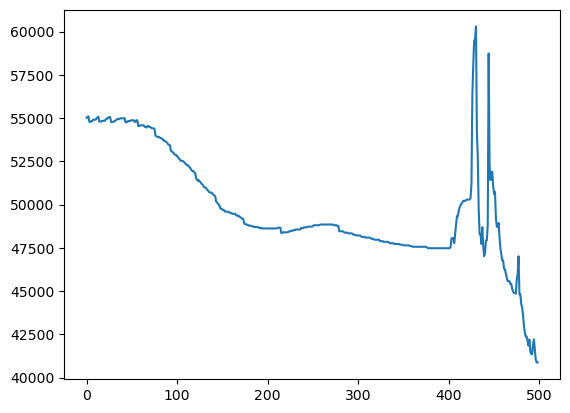

In [27]:
from matplotlib import pyplot as plt

# Load water readings from database
c.execute("""SELECT dissolved_oxygen, temperature FROM water""")
water_values = c.fetchall()

# Calculate pO2 for each reading
Hcc = 3.2e-2
R = 8.314  # JK-1mol-1
pO2 = []
for do, t in water_values:
    pO2.append((R * t * do) / Hcc)
plt.plot(pO2)
plt.show()


In [20]:
c.execute("""SELECT name FROM sqlite_master WHERE type='table' AND name!='water_rt'""")
phantoms = c.fetchall()

9.186253101736973


In [ ]:
c.execute("""CREATE TABLE IF NOT EXISTS henry_constants_calculated (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        phantom STRING NOT NULL,
        average_dot FLOAT NOT NULL,
        hcxx FLOAT NOT NULL,
        khx FLOAT NOT NULL)
        """)
for phantom in phantoms:
    c.execute(f"""SELECT AVERAGE(dissolved_oxygen) FROM {phantom}""")
    do = c.fetchall()
    kHx = (Hcc / R * t_water) * (do / do_water)
    pO2 = do_water / kH

    c.execute(f"""INSERT INTO henry_constants_calculated (phantom, average_do, hccx, khx) VALUES (?, ?, ?, ?, ?)}""",
              (phantom, do, Hccx, kHx))
c.commit()